SGD from scratch [DL1v3L2](https://www.youtube.com/watch?v=Egp4Zajhzog&feature=youtu.be&t=4506)

---

20190319

In [1]:
%matplotlib inline
from fastai.basics import *

In [2]:
n = 100
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.3829,  1.0000],
        [-0.3399,  1.0000],
        [-0.6294,  1.0000],
        [-0.5407,  1.0000],
        [-0.4656,  1.0000]])

In [3]:
x[:,0].uniform_(-1.,1)

tensor([ 0.4270,  0.1077,  0.8732, -0.9468,  0.5935,  0.1861,  0.2842, -0.6917,
        -0.3386,  0.9170,  0.0843,  0.4042, -0.4758, -0.7329,  0.2244,  0.2695,
        -0.7686, -0.9538, -0.5557,  0.1188,  0.0779,  0.8965,  0.2088,  0.5891,
         0.3717, -0.0907,  0.5365, -0.7505,  0.2983,  0.2910,  0.3748,  0.6752,
        -0.3633, -0.0750,  0.1077,  0.9328, -0.1067, -0.4080, -0.9064,  0.4804,
        -0.9643, -0.7976,  0.8201,  0.8555,  0.3284,  0.7600,  0.1984, -0.3677,
         0.7331,  0.8401, -0.5819, -0.2124, -0.3366,  0.2674,  0.2590, -0.2374,
        -0.2060,  0.7473, -0.4544, -0.5058,  0.2518, -0.6070, -0.5068, -0.9048,
         0.3618, -0.6151, -0.8686,  0.5893, -0.1287,  0.3405, -0.1432, -0.6280,
        -0.5508, -0.5516,  0.2127, -0.7206,  0.0221, -0.6375, -0.0634, -0.3921,
        -0.8713,  0.8618, -0.5663,  0.7295, -0.8350,  0.3075,  0.0714,  0.3806,
         0.9231,  0.0525, -0.9772, -0.8496, -0.1489,  0.1201, -0.3769, -0.9240,
        -0.0754, -0.5771, -0.7435,  0.34

In [4]:
x[...,0].uniform_(-1.,1)

tensor([ 0.5029, -0.8675,  0.1584, -0.7936,  0.0668, -0.0502, -0.3178,  0.0809,
        -0.6652, -0.6875, -0.8495, -0.6588, -0.2456, -0.9909,  0.7004,  0.4487,
        -0.4262, -0.4341, -0.9663, -0.8335,  0.2906, -0.3500,  0.7761, -0.9401,
         0.0301,  0.1116,  0.8371,  0.1849, -0.8827, -0.3542, -0.2903,  0.6916,
        -0.2244,  0.9484, -0.9053, -0.0966, -0.7188, -0.0694,  0.4652,  0.4692,
        -0.1208, -0.1466, -0.4705, -0.8637,  0.0967,  0.0472, -0.4679, -0.2222,
        -0.6715, -0.3316,  0.3381, -0.8022, -0.8435, -0.5212, -0.3512,  0.8711,
        -0.5783,  0.4153, -0.3850,  0.7484,  0.8107, -0.8971, -0.2269, -0.6752,
         0.5796,  0.5663,  0.7107, -0.8091,  0.6308, -0.6916,  0.6000,  0.6698,
        -0.6610,  0.0859,  0.3195,  0.6365,  0.1618,  0.6910, -0.8967, -0.9488,
         0.8125, -0.8284, -0.4796,  0.6932,  0.4089,  0.1068, -0.6198,  0.3523,
        -0.9819, -0.8646,  0.8990,  0.4358,  0.6405, -0.7631,  0.9981,  0.5983,
        -0.7597, -0.5787, -0.2259,  0.90

In [6]:
a = tensor(3.,2); a

tensor([3., 2.])

In [7]:
y = x@a + torch.rand(n)

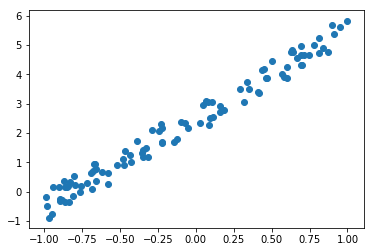

In [8]:
plt.scatter(x[:,0],y);

In [9]:
def mse(y_hat, y,): return ((y_hat - y)**2).mean()

In [10]:
a = tensor(-1.,1)

In [11]:
y_hat = x@a

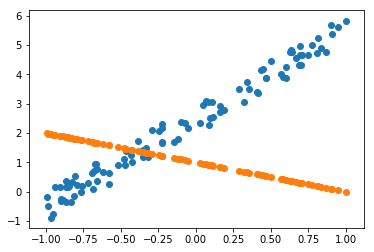

In [16]:
plt.scatter(x[:,0],y), plt.scatter(x[:,0],y_hat);

In [17]:
mse(y_hat, y)

tensor(7.3416)

In [18]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [19]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [20]:
lr = 1e-1
for t in range(100): update()

tensor(7.3416, grad_fn=<MeanBackward1>)
tensor(1.4959, grad_fn=<MeanBackward1>)
tensor(0.3886, grad_fn=<MeanBackward1>)
tensor(0.1488, grad_fn=<MeanBackward1>)
tensor(0.0965, grad_fn=<MeanBackward1>)
tensor(0.0850, grad_fn=<MeanBackward1>)
tensor(0.0825, grad_fn=<MeanBackward1>)
tensor(0.0820, grad_fn=<MeanBackward1>)
tensor(0.0819, grad_fn=<MeanBackward1>)
tensor(0.0819, grad_fn=<MeanBackward1>)


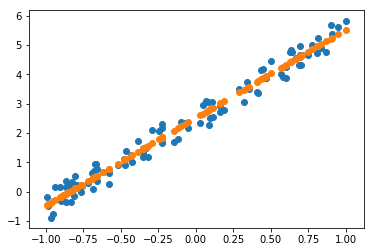

In [23]:
plt.scatter(x[:,0],y), plt.scatter(x[:,0], x@a);

In [24]:
a

Parameter containing:
tensor([3.0053, 2.5236], requires_grad=True)

In [25]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [36]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

In [37]:
def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

In [38]:
animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)

the only difference between SGD and this (GD) is minibatches. We calculated the value of the loss on the whole dataset on each iteration. SGD grabs a minibatch at random, calculates the loss on them and updates the weights, and continues.

So in `update`, the lines: 

    y_hat = x@a
    loss = mse(y, y_hat)

instead looks more like:

    y_hat = x[rand_idx]@a
    loss = mse(y[rand_idx], y_hat)

The architecture is the mathematical function you're trying fitting the parameters to (a bunch of matrix products). The architecture and model are almost the same thing.